# **Breast Cancer Classification**

This project emphasizes the urgency of early and precise diagnosis in breast cancer, a prevalent and fatal disease among women globally. It discusses the pivotal role particularly those employing deep learning techniques, in mitigating challenges associated with manual image analysis and improving sensitivity in detecting breast cancer across various medical imaging modalities. Despite the increasing adoption of deep learning methods, the review identifies gaps in existing literature and aims to provide a comprehensive analysis of deep neural network (DNN)-based CAD systems for breast cancer classification. It highlights the importance of addressing challenges such as limited dataset availability, model interpretability, and generalizability across diverse populations to facilitate the translation of these methods into clinical practice for better diagnosis and prognosis of breast cancer. Additionally, the review presents ten open research challenges to guide future scholars interested in advancing breast cancer classification models through various imaging modalities, providing a valuable resource for both beginners and advanced researchers in this field.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Necessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [4]:
# #this used to unzip file
# import zipfile
# import os

# # Path to your zip file
# zip_file_path = "/content/drive/MyDrive/DS-SB/Capstone-3/archive.zip"

# # Directory where you want to extract the contents
# extracted_dir = "/content/drive/MyDrive/DS-SB/Capstone-3/data_brest"

# # Create the directory if it doesn't exist
# if not os.path.exists(extracted_dir):
#     os.makedirs(extracted_dir)

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_dir)

# # Now, you can proceed to read the data from the extracted directory
# # For example, you can use the code provided in the previous message to read the data from the extracted directory


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools


# **Loading, Data Wrangling and EDA Work**

Basic Statistics:
           Label   Num_Images
count  24.000000    24.000000
mean    0.500000   492.583333
std     0.510754   500.461519
min     0.000000    23.000000
25%     0.000000   103.750000
50%     0.500000   391.500000
75%     1.000000   651.250000
max     1.000000  2086.000000


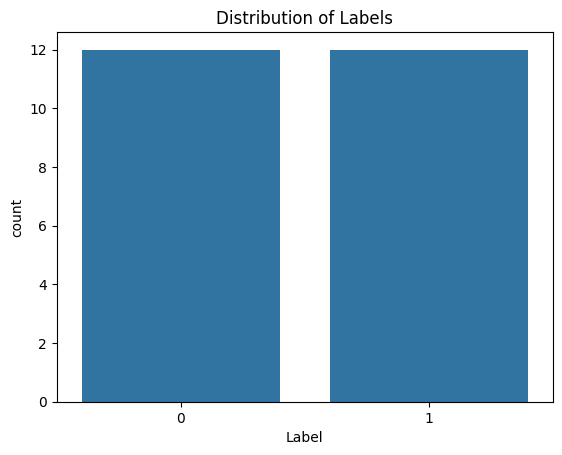

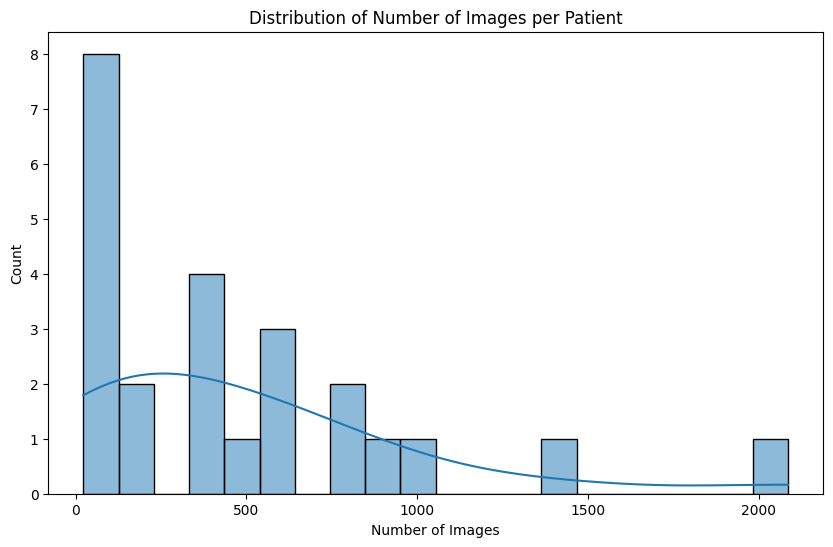

In [6]:
import os
import pandas as pd
import seaborn as sns

# Define the path to the dataset directory
data_dir = "/content/drive/MyDrive/DS-SB/Capstone-3/data_brest"

# Create empty lists to store data
data = []

# Iterate over patient ID folders
for patient_id in os.listdir(data_dir):
    patient_dir = os.path.join(data_dir, patient_id)

    # Iterate over subfolders (0 and 1) representing negative and positive cases
    for label in ['0', '1']:
        label_dir = os.path.join(patient_dir, label)

        # Check if the label directory exists
        if os.path.exists(label_dir):
            # Count the number of images in each class
            num_images = len(os.listdir(label_dir))

            # Append data to the list
            data.append({'Patient_ID': patient_id, 'Label': int(label), 'Num_Images': num_images})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display basic statistics about the dataset
print("Basic Statistics:")
print(df.describe())

# Plot the distribution of labels
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()

# Plot the distribution of the number of images per patient
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Num_Images', bins=20, kde=True)
plt.title('Distribution of Number of Images per Patient')
plt.xlabel('Number of Images')
plt.ylabel('Count')
plt.show()


Missing Values:
Patient_ID    0
Label         0
Num_Images    0
dtype: int64

Correlation Matrix:
               Label  Num_Images
Label       1.000000   -0.583253
Num_Images -0.583253    1.000000


<ipython-input-13-4e47245356ac>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


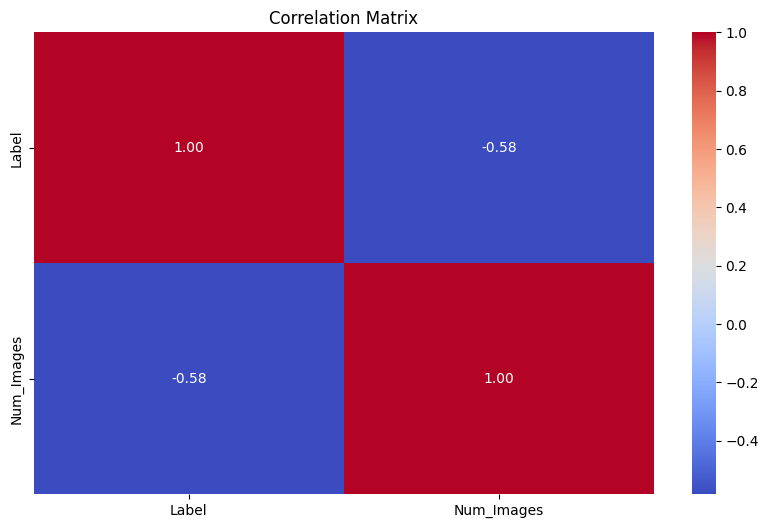

In [13]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Explore correlations between features
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

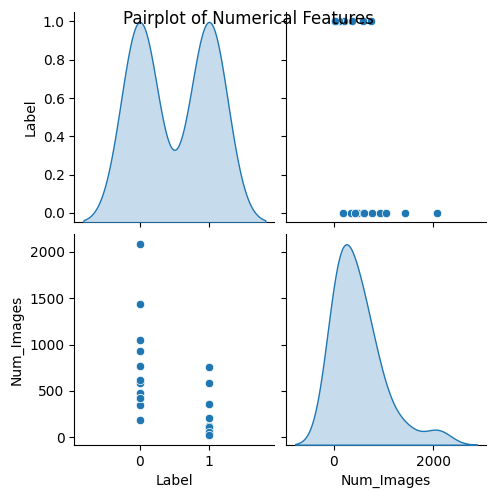


Updated DataFrame:
  Patient_ID  Label  Num_Images  Total_Num_Images
0      10253      0         479               549
1      10253      1          70               549
2      10254      0         772               848
3      10254      1          76               848
4      10255      0         181               272


In [14]:
# Visualize distributions of numerical features
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

# Feature engineering: Calculate the total number of images per patient
total_images_per_patient = df.groupby('Patient_ID')['Num_Images'].sum().reset_index()
total_images_per_patient.columns = ['Patient_ID', 'Total_Num_Images']

# Merge total images per patient with the original dataframe
df = pd.merge(df, total_images_per_patient, on='Patient_ID')

# Display the updated dataframe
print("\nUpdated DataFrame:")
print(df.head())


<Figure size 1000x600 with 0 Axes>

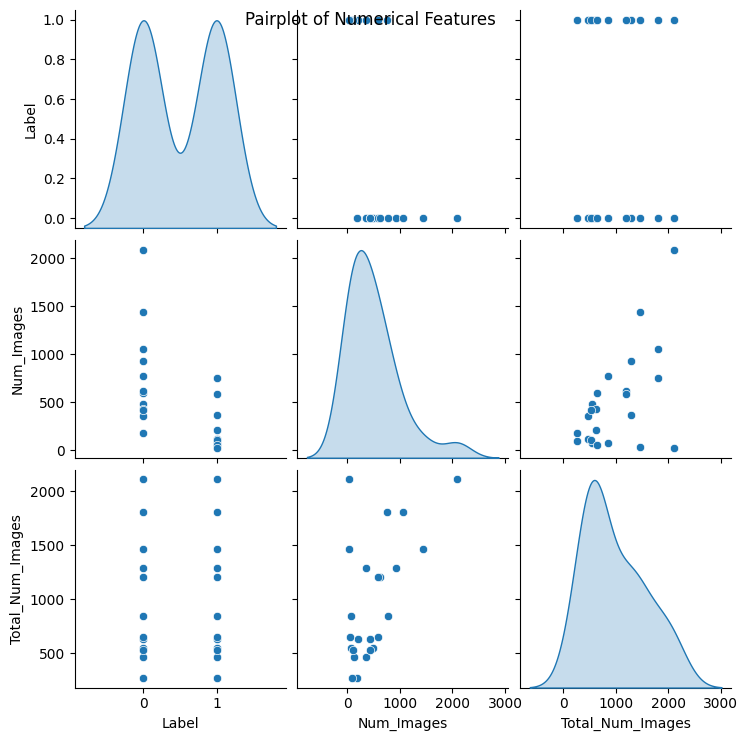


Updated DataFrame:
  Patient_ID  Label  Num_Images  Total_Num_Images_x  Total_Num_Images_y
0      10253      0         479                 549                 549
1      10253      1          70                 549                 549
2      10254      0         772                 848                 848
3      10254      1          76                 848                 848
4      10255      0         181                 272                 272


In [15]:
# Visualize distributions of numerical features
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

# Feature engineering: Calculate the total number of images per patient
total_images_per_patient = df.groupby('Patient_ID')['Num_Images'].sum().reset_index()
total_images_per_patient.columns = ['Patient_ID', 'Total_Num_Images']

# Merge total images per patient with the original dataframe
df = pd.merge(df, total_images_per_patient, on='Patient_ID')

# Display the updated dataframe
print("\nUpdated DataFrame:")
print(df.head())


**Loading Dataset** and **Visualizing**

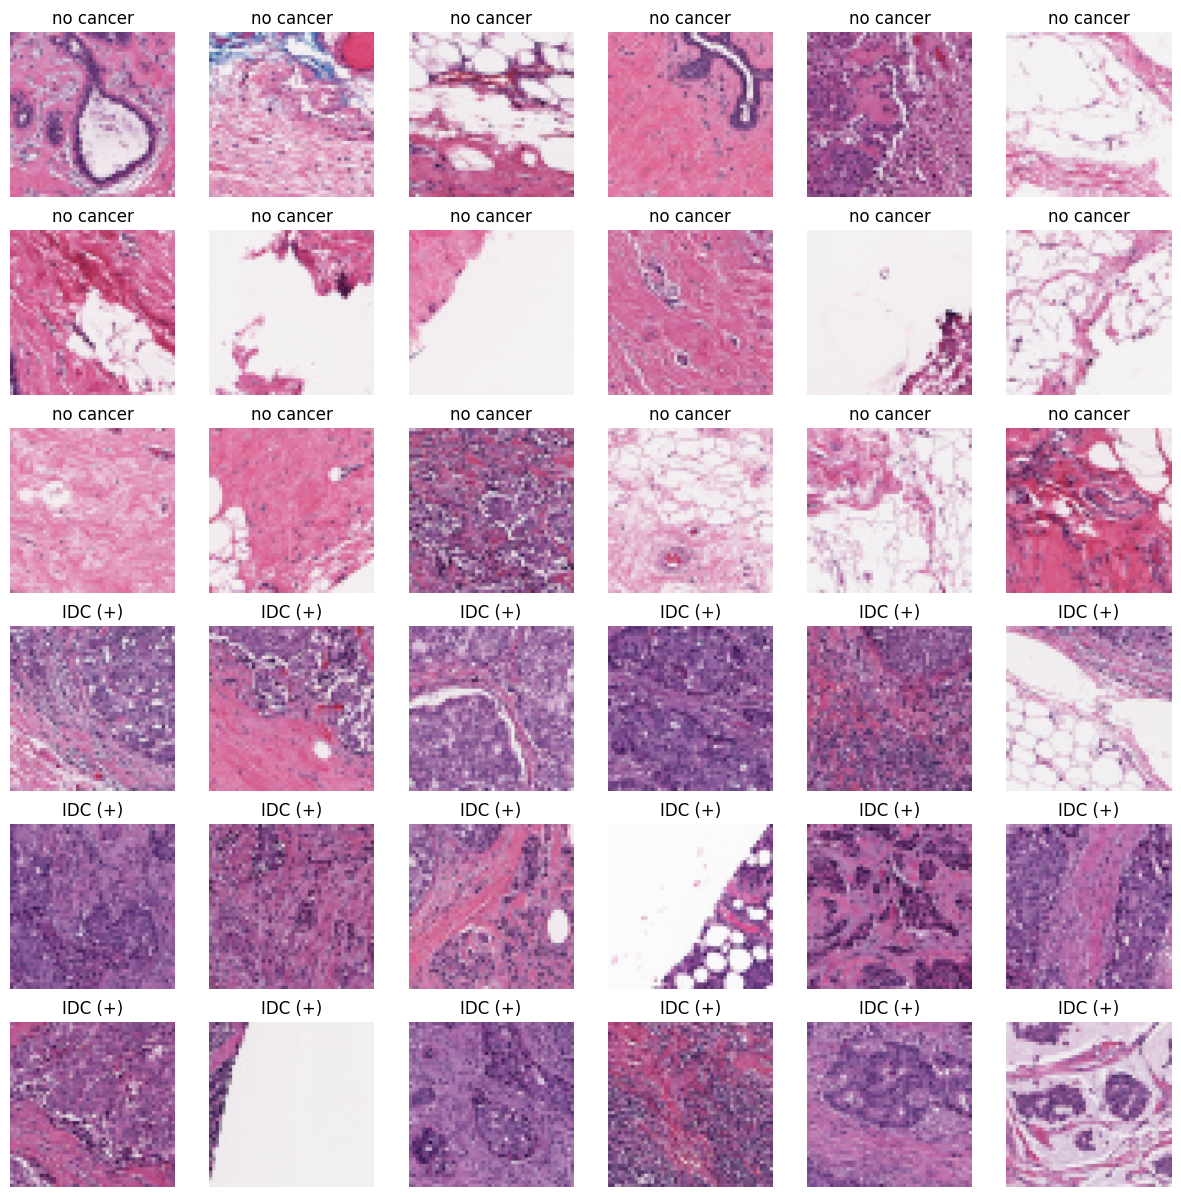

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

data_dir = "/content/drive/MyDrive/DS-SB/Capstone-3/data_brest"  # Path to the root directory containing all patient data

# Initialize lists to store image paths
image_paths_0 = []
image_paths_1 = []

# Iterate over patient ID folders
for patient_id in os.listdir(data_dir):
    patient_dir = os.path.join(data_dir, patient_id)

    # Iterate over subfolders (0 and 1) representing negative and positive cases
    for label in ['0', '1']:
        label_dir = os.path.join(patient_dir, label)

        # Check if the label directory exists
        if os.path.exists(label_dir):
            # List image files in the label directory
            image_files = os.listdir(label_dir)

            # Append the path of the first image from each class to the respective list
            if label == '0':
                image_paths_0.extend([os.path.join(label_dir, img) for img in image_files])
            elif label == '1':
                image_paths_1.extend([os.path.join(label_dir, img) for img in image_files])

# Randomly select 18 images from each class
some_non = np.random.choice(image_paths_0, size=18, replace=False)
some_can = np.random.choice(image_paths_1, size=18, replace=False)

# Plot the images
plt.figure(figsize=(15, 15))
for i, img_path in enumerate(some_non):
    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, i + 1)
    plt.axis('off')
    plt.title('no cancer')
    plt.imshow(img.astype('uint8'))

for i, img_path in enumerate(some_can):
    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, i + len(some_non) + 1)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(img.astype('uint8'))

plt.show()


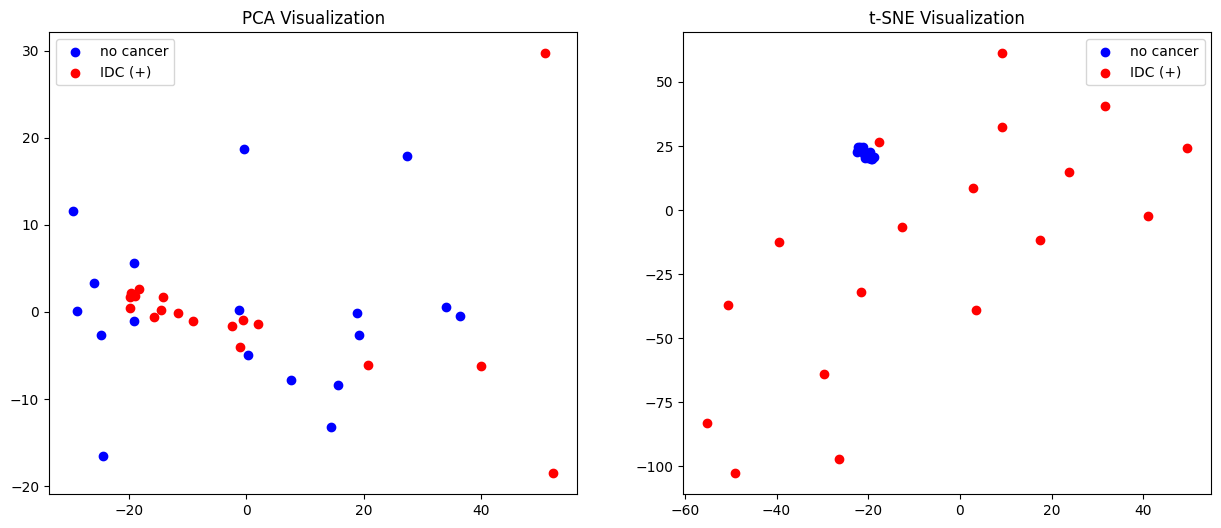

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Function to preprocess and extract features from images
def preprocess_images(image_paths):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(100, 100))
        img = image.img_to_array(img)
        img /= 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Preprocess images
non_cancer_images = preprocess_images(some_non)
cancer_images = preprocess_images(some_can)

# Reshape images for PCA and t-SNE
non_cancer_images_flat = non_cancer_images.reshape(non_cancer_images.shape[0], -1)
cancer_images_flat = cancer_images.reshape(cancer_images.shape[0], -1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=15)  # Reduce to 50 principal components
non_cancer_pca = pca.fit_transform(non_cancer_images_flat)
cancer_pca = pca.fit_transform(cancer_images_flat)

# Perform t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
non_cancer_tsne = tsne.fit_transform(non_cancer_pca)
cancer_tsne = tsne.fit_transform(cancer_pca)


# Plot PCA and t-SNE visualizations
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(non_cancer_pca[:, 0], non_cancer_pca[:, 1], label='no cancer', color='blue')
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1], label='IDC (+)', color='red')
plt.title('PCA Visualization')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(non_cancer_tsne[:, 0], non_cancer_tsne[:, 1], label='no cancer', color='blue')
plt.scatter(cancer_tsne[:, 0], cancer_tsne[:, 1], label='IDC (+)', color='red')
plt.title('t-SNE Visualization')
plt.legend()

plt.show()


In both the PCA and t-SNE visualizations, the x and y axes represent abstract dimensions derived from dimensionality reduction techniques applied to the data. In PCA, these dimensions are the principal components, which capture the most variance in the data. The x-axis typically represents the first principal component, while the y-axis represents the second principal component. In t-SNE, the dimensions represent transformed coordinates in a lower-dimensional space, optimized to maintain local structure relationships between data points. Consequently, while the axes provide a visualization of the data's reduced dimensionality, they lack direct interpretations in terms of original features, serving instead as abstract representations of data variance and structure.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image


In [9]:
NewN_IDC=image_paths_0[:2482]
print(len(NewN_IDC))
print(len(image_paths_1))

2482
2482


**Data Preprocessing**

In [10]:
non_img_arr = []
can_img_arr = []

for img in NewN_IDC:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in image_paths_1:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])


In [11]:
print(len(non_img_arr))
print(len(can_img_arr))
print(len(non_img_arr)+len(can_img_arr))

2482
2482
4964


In [12]:
import numpy as np
import random

# Extract features (images) and labels from non_img_arr
non_img_features = np.array([item[0] for item in non_img_arr[:1100]])
non_img_labels = np.array([item[1] for item in non_img_arr[:1100]])

# Extract features (images) and labels from can_img_arr
can_img_features = np.array([item[0] for item in can_img_arr[:1100]])
can_img_labels = np.array([item[1] for item in can_img_arr[:1100]])

# Concatenate features and labels separately
X = np.concatenate((non_img_features, can_img_features))
y = np.concatenate((non_img_labels, can_img_labels))

# Shuffle the combined arrays
combined = list(zip(X, y))
random.shuffle(combined)
X, y = zip(*combined)

# Convert lists of features and labels to NumPy arrays
X = np.array(X)
y = np.array(y)


In [13]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)


Total number of images: 2200
Number of IDC(-) Images: 1100
Number of IDC(+) Images: 1100
Image shape (Width, Height, Channels): (50, 50, 3)


 Presented a convolutional neural network (CNN) architecture tailored for the classification and prediction of breast cancer. The model comprises convolutional layers followed by batch normalization and ReLU activation, aimed at extracting meaningful features from input images. Max pooling layers are utilized for downsampling, while dropout layers mitigate overfitting by randomly deactivating neurons during training. The architecture concludes with fully connected layers and a softmax output layer for binary classification, distinguishing between benign and malignant tumors.

To prevent overfitting and optimize training efficiency, the implementation incorporates early stopping with a patience of 5 epochs, monitoring validation loss. The Adam optimizer with a low learning rate of 0.0001 is employed alongside binary cross-entropy loss, suitable for binary classification tasks. The model summary provides insight into each layer's configuration, including the type of layer, output shape, and trainable parameters, totaling 2,514,410, with the bulk being trainable parameters, and a small portion being non-trainable parameters utilized in batch normalization.

Overall, this CNN architecture is engineered to effectively process breast cancer image data, extracting relevant features for accurate classification. By integrating techniques like dropout, batch normalization, and early stopping, the model aims to strike a balance between performance and generalization, crucial for real-world applications in medical image analysis.

# **Modeling**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1540, 50, 50, 3)
Testing Data Shape: (660, 50, 50, 3)


In [15]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [16]:
X_train = X_train.reshape(-1, 50, 50, 3)
X_test = X_test.reshape(-1, 50, 50, 3)


In [17]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 50, 50, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 25, 25, 32)        128       
 chNormalization)                                                
                                                        

In [19]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 75, batch_size = 40)


Epoch 1/75
39/39 [==============================] - 30s 656ms/step - loss: 0.6254 - accuracy: 0.6974 - val_loss: 2.5495 - val_accuracy: 0.5015
Epoch 2/75
39/39 [==============================] - 25s 641ms/step - loss: 0.4327 - accuracy: 0.8240 - val_loss: 1.8434 - val_accuracy: 0.5015
Epoch 3/75
39/39 [==============================] - 27s 688ms/step - loss: 0.3799 - accuracy: 0.8636 - val_loss: 1.2032 - val_accuracy: 0.5242
Epoch 4/75
39/39 [==============================] - 24s 610ms/step - loss: 0.3605 - accuracy: 0.8604 - val_loss: 0.8600 - val_accuracy: 0.6045
Epoch 5/75
39/39 [==============================] - 26s 673ms/step - loss: 0.3356 - accuracy: 0.8779 - val_loss: 0.5880 - val_accuracy: 0.6924
Epoch 6/75
39/39 [==============================] - 25s 651ms/step - loss: 0.3171 - accuracy: 0.8857 - val_loss: 0.3795 - val_accuracy: 0.8091
Epoch 7/75
39/39 [==============================] - 25s 651ms/step - loss: 0.2763 - accuracy: 0.9162 - val_loss: 0.3081 - val_accuracy: 0.8727

# **Model Evaluation**

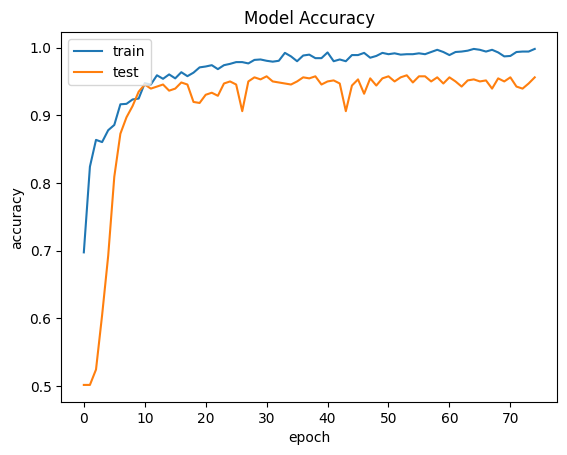

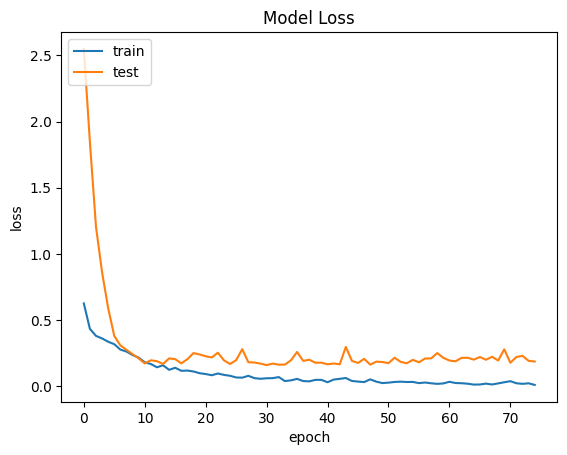

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


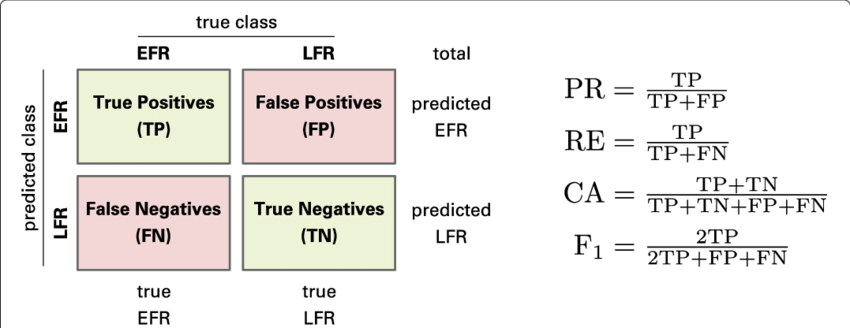

21/21 [==============================] - 2s 98ms/step


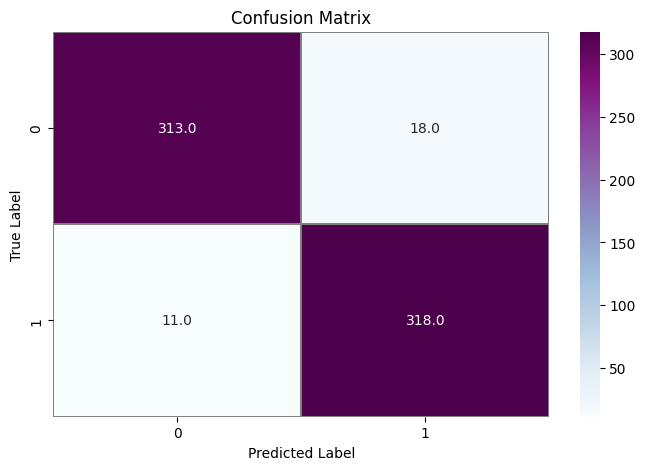

In [21]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix is displayed directly using sns.heatmap().
Each cell in the heatmap represents the count of true positives, false positives, true negatives, and false negatives.
The values are not normalized to percentages.

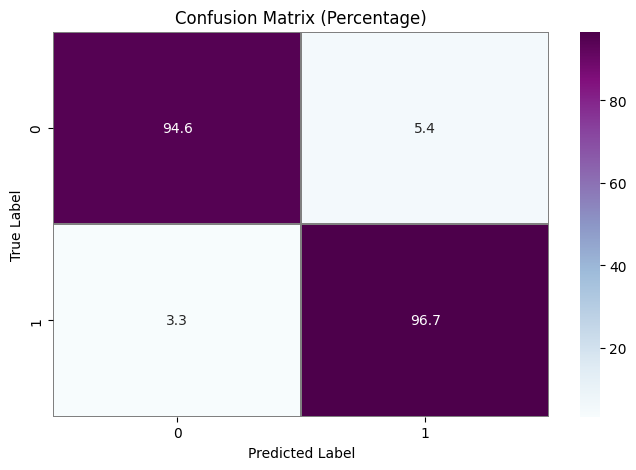

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# calculate the percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx_percent, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()

The confusion matrix is first calculated similarly using confusion_matrix().
Then, the values are normalized to percentages by dividing each cell by the sum of the corresponding row and multiplying by 100.
The resulting percentages are then displayed in the heatmap using sns.heatmap()

In [23]:
model.evaluate(X_test,Y_test)

21/21 [==============================] - 2s 116ms/step - loss: 0.1862 - accuracy: 0.9561


[0.1861744225025177, 0.9560605883598328]

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already calculated Y_true and Y_pred_classes

# Calculate confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Calculate recall, precision, and F-1 score
recall = recall_score(Y_true, Y_pred_classes, average='macro')
precision = precision_score(Y_true, Y_pred_classes, average='macro')
f1 = f1_score(Y_true, Y_pred_classes, average='macro')

# Print the metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Recall: 0.9560923424457525
Precision: 0.9562389770723103
F1 Score: 0.9560580841416518


**Testing and Validating**

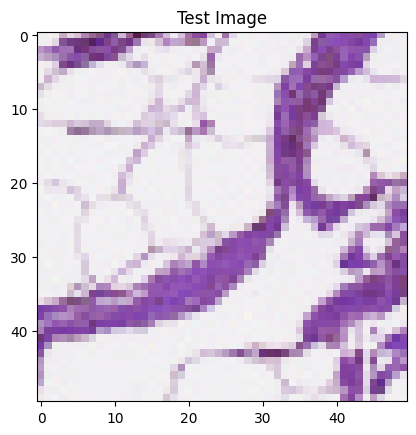

In [25]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 2
img_plot(X_test, index)

In [26]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 100
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 24ms/step
Predicted Value using  cnn model 0
True Value 0


# **Summary**

Proveeded the training process of a neural network model, likely a convolutional neural network, over 75 epochs for a classification task. Throughout training, both training and validation losses steadily decrease, indicating that the model is learning and improving its predictive performance. Simultaneously, the accuracies for both training and validation datasets increase, suggesting that the model is becoming more adept at classifying the data it was trained on and unseen validation data. It's noteworthy that the validation loss and accuracy are critical metrics to monitor for potential overfitting, where the model performs well on the training data but poorly on unseen data. Ideally, the testing loss should not be significantly higher than the training loss, as this suggests overfitting, where the model fails to generalize well to unseen data. Similarly, while the testing accuracy might be slightly lower than the training accuracy, a significant disparity could also indicate overfitting, emphasizing the importance of regularizing techniques and monitoring both training and validation performance closely.

# **Future Work**

1. **Optimizing CNN Architecture**: Investigate different configurations of convolutional neural network (CNN) architectures to enhance classification performance for breast cancer detection.

2. **Feature Engineering and Selection**: Explore additional image preprocessing techniques and feature selection methods to improve the efficiency and effectiveness of feature extraction from breast cancer images.

3. **Transfer Learning**: Investigate the effectiveness of transfer learning by leveraging pre-trained CNN models such as VGG, ResNet, or Inception for breast cancer classification tasks.

4. **Data Augmentation**: Evaluate the impact of various data augmentation techniques, such as rotation, flipping, and zooming, on model generalization and performance in breast cancer classification.

5. **Model Interpretability**: Explore methods for interpreting CNN models to gain insights into which image features contribute most significantly to the classification of breast cancer images.

6. **Deployment and Clinical Integration**: Investigate strategies for deploying trained models in clinical settings for real-time breast cancer detection and diagnosis, considering factors such as computational resources, latency, and interpretability.

7. **Multi-Modal Fusion**: Explore the fusion of multiple imaging modalities (e.g., mammography, ultrasound, MRI) to develop a more comprehensive and accurate breast cancer classification system.

8. **Patient Outcome Prediction**: Extend the study to predict patient outcomes, such as recurrence or survival rates, based on histopathological images and clinical data, using advanced machine learning techniques.

9. **Addressing Class Imbalance**: Investigate techniques for handling class imbalance in the dataset, such as oversampling, undersampling, or using advanced algorithms like SMOTE (Synthetic Minority Over-sampling Technique).

10. **Robustness and Generalization**: Evaluate the robustness and generalization capabilities of the trained model across different datasets, patient demographics, and imaging conditions to ensure reliable performance in diverse real-world scenarios.